In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

In [2]:
function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

pvalue_clopper_pearson(6, 10, 1/4)

0.039455413818359396

In [3]:
2cdf(Beta(6, 10-6+1), 1/4)

0.039455413818359396

In [4]:
x ⪅ y = x < y || x ≈ y

function pvalue_sterne(k, n, p)
    bin = Binomial(n, p)
    sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ pdf(bin, k))
end

pvalue_sterne(6, 10, 1/4)

0.019727706909179726

In [5]:
function pvalue_wilson(k, n, p)
    bin = Binomial(n, p)
    μ, σ = mean(bin), std(bin)
    normal = Normal(μ, σ)
    min(1, 2cdf(normal, k), 2ccdf(normal, k))
end

pvalue_wilson(6, 10, 1/4)

0.010587137334056944

In [6]:
function pvalue_wald(k, n, p)
    bin = Binomial(n, p)
    p̂ = k/n
    μ, σ = mean(bin), √(n * p̂ * (1 - p̂))
    normal = Normal(μ, σ)
    min(1, 2cdf(normal, k), 2ccdf(normal, k))
end

pvalue_wald(6, 10, 1/4)

0.02386844216457435

In [7]:
using Roots

# 手抜き
function confint(pvaluefunc, k, n; α=0.05)
    find_zeros(p -> pvaluefunc(k, n, p) - α, 0, 1)
end

for t in (:clopper_pearson, :sterne, :wilson, :wald)
    f = Symbol(:confint_, t)
    g = Symbol(:pvalue_, t)
    @eval $f(k, n; α=0.05) = confint($g, k, n; α)
end

for t in (:clopper_pearson, :sterne, :wilson, :wald)
    f = Symbol(:confint_, t)
    @eval @show $f(6, 10; α=0.05)
end

confint_clopper_pearson(6, 10; α = 0.05) = [0.262378076606945, 0.8784477418801727]
confint_sterne(6, 10; α = 0.05) = [0.2908654299533005, 0.84997175919332]
confint_wilson(6, 10; α = 0.05) = [0.3126737697336583, 0.8318196702937638]
confint_wald(6, 10; α = 0.05) = [0.29636368514840156, 0.9036363148515983]


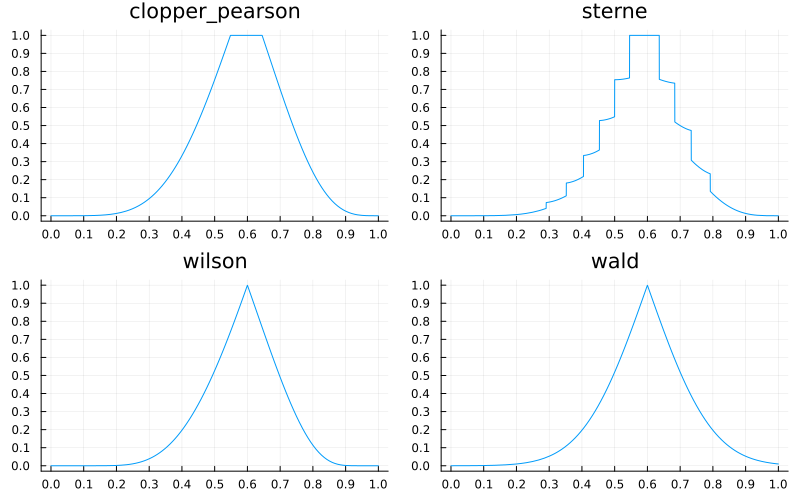

In [8]:
for (k, t) in enumerate((:clopper_pearson, :sterne, :wilson, :wald))
    P = Symbol(:P, k)
    g = Symbol(:pvalue_, t)
    @eval $P = plot(p -> $g(6, 10, p), 0, 1; label="")
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    title!("$t")
end
plot(P1, P2, P3, P4; size=(800, 500))